## Jupyter Notebook to demonstrate usage of ARTIC
### Open questions
- Connectivity matrix from Hannachi et al.? Do they have one? With what created?
- Different amount of samples between *_d and *_msw

In [1]:
from src.arctic import *
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Given Data
- from Institute of Atmospheric Physics Kühlungsborn (IAP)
- Differentiated between ERA5 and UA-ICON(NWP) data

1. ERA5: daily means at pressure levels and analysis
    - Intercomparison with Hannachi et al. (2011)
    - SWE1.tar: contains major warming diagnostics
    - SWE1.tar: elliptic diagnostics of Z10
    - SWX1.tar: extended diagnostics (reachable via VPN)
    - SWC1.tar: classfiication synthesis (reachable via VPN)
2. NWP4A60: data at pressure levels and analysis
    - SWM2.tar: major warming diagnostics
    - SWE2.tar: elliptic diagnostics of Z10
    - SWX2.tar: extended diagnostics (VPN)
    - SWC2.tar: classification synthesis (VPN)

#### File structure
netCDF files are 3-dimensional data, investigated with ncdump. The .tar-files contain all output from Christoph Zülickes diagnosis, in particular:
- SWM: ASCII values in 2 files, 
    1. *cen.csv with the major warming events as identified with their central day when the wind turned from westerly to easterly along with some characteristics and
    2. *msw.csv with daily lists with wind and a marker mw for major warming
- SWE: 1 csv file
    - *d.csv: daily list of indices, including the aspect ratio of the mother vortex (ar), centrail latitude (latcent) and area (area)

In [2]:
# load data
# preliminary, ideally include api from climate data storage (cds)
era5_d = pd.read_csv("data/SWXClust/ERA5/e5e1_d.csv", skiprows=75)
era5_cen = pd.read_csv("data/SWXClust/ERA5/e5m1t-cen.csv", skiprows=30)
era5_msw = pd.read_csv("data/SWXClust/ERA5/e5m1t-msw.csv", skiprows=25)

nwp_d = pd.read_csv("data/SWXClust/NWP4A60/i4a60e2_d.csv", skiprows=75)
nwp_cen= pd.read_csv("data/SWXClust/NWP4A60/i4a60m2t-cen.csv", skiprows=30)
nwp_msw = pd.read_csv("data/SWXClust/NWP4A60/i4a60m2t-msw.csv", skiprows=25)

In [3]:
# delete space in front of strings
def no_white_space(df, sep = ' '):
    col = []
    for c in df.columns:
        col.append(c.split(sep)[-1])
    df.columns = col
    
# convert strings to actual dates
def to_date(df, col, format='mixed'):
    df[col] = pd.to_datetime(df[col], format=format)

# remove white space from column names
no_white_space(era5_d)
no_white_space(era5_cen)
no_white_space(era5_msw)

# no_white_space(nwp_d)
# no_white_space(nwp_cen)
# no_white_space(nwp_msw)


# remove empty rows from files
era5_d = era5_d[era5_d['string'].notna()]
era5_cen = era5_cen[era5_cen['string'].notna()]
era5_msw = era5_msw[era5_msw['string'].notna()]

# nwp_d = nwp_d[nwp_d['string'].notna()]
# nwp_cen = nwp_cen[nwp_cen['string'].notna()]
# nwp_msw = nwp_msw[nwp_msw['string'].notna()]


# change string to datetime for better comparison
to_date(era5_d, 'string')
to_date(era5_cen, 'string')
to_date(era5_msw, 'string')

# drop where string is nan (empty lines)
era5_d = era5_d.replace('                   ' ,np.NaN)

era5_d.head()

,D,counter,time,string,year,month,day,hour,level,edge,...,obj_area2,latcent2,loncent2,theta2,ar2,amp0,amp1,amp2,lon1,lon2
4,D,1.0,2438031.25,1963-01-01 18:00:00,1963.0,1.0,1.0,18.0,10.0,29.2,...,NaN,NaN,NaN,NaN,NaN,27.9,0.01040,0.0111,5.4,-2.5
5,D,2.0,2438032.25,1963-02-01 18:00:00,1963.0,1.0,2.0,18.0,10.0,29.2,...,NaN,NaN,NaN,NaN,NaN,27.9,0.00858,0.0097,3.3,-2.3
6,D,3.0,2438033.25,1963-03-01 18:00:00,1963.0,1.0,3.0,18.0,10.0,29.2,...,NaN,NaN,NaN,NaN,NaN,27.9,0.01120,0.0123,0.4,-2.7
7,D,4.0,2438034.25,1963-04-01 18:00:00,1963.0,1.0,4.0,18.0,10.0,29.2,...,NaN,NaN,NaN,NaN,NaN,27.8,0.01190,0.0126,2.1,-2.5
8,D,5.0,2438035.25,1963-05-01 18:00:00,1963.0,1.0,5.0,18.0,10.0,29.2,...,NaN,NaN,NaN,NaN,NaN,27.8,0.01080,0.0117,7.1,-2.5


## Features in data and their description
#### for *cen files

35x9

| ERA5            | D_cen              | num               | counter_cen                   | time_cen                  | string                       | pers     | Umax         | Imax        | Iacc                         |
|-----------------|--------------------|-------------------|-------------------------------|---------------------------|------------------------------|----------|--------------|-------------|------------------------------|
| Values          | 'D'                | [1,35]            | [26, 21189]                   | [2438057.25, 2459220.35]  | [1963-01-27,2021-05-01]      | [2.0,29] | [-26.9,-0.9] | [1.7,780.1] | [1.4,316.5]                  |
| Explanation     | Line start in csv? | Counter of events | Counter matching measurements | Encoding of time as float | human readablestring of date | ??       | ??           | E_max?      | accumulated easterlies (m/s) |
| Condition       | -                  | -                 |                               |                           |                              |          |              |             |                              |
| Normalization   | no                 | no                |                               |                           |                              |          |              |             |                              |
| Value for model | None               | Probably none     | Merge key                     | Merge key                 | Merge key                    |          |              |             |                              |

#### for *msw files

21914x6

| ERA5            | D_msw              | counter_msw                                                 | time_msw                   | string                      | u                             | MW                  |
|-----------------|--------------------|-------------------------------------------------------------|----------------------------|-----------------------------|-------------------------------|---------------------|
| Values          | 'D'                | [1, 21914]                                                  | [2438032.25, 2459944.25]   | String encoding of date     | [-28.8, 73.5]                 | [0,1] (i.e. no/yes) |
| Explanation     | Line start in csv? | Counter of events, <br/>each daily measurement gets counter | Encoding of time as float? | human readable form of date | Velocity of wind? **unclear** | marks major warming |
| Condition       | -                  |                                                             |                            |                             | ??                            |                     |
| Normalization   | no                 | no                                                          | unclear                    | no                          |                               | no                  |
| Value for Model | None               | Merge key                                                   | Merge key                  | Merge key                   | ??                            | should be included  |



#### for *d files

22403x35

21425 + 978 (D vs. S)

**bold font**: unclear meaning

| ERA5         | Values                   | Explanation                                           | Condition                          | Normalisation | Value for Model                                             |
|--------------|--------------------------|-------------------------------------------------------|------------------------------------|---------------|-------------------------------------------------------------|
| D            | ['C', 'D']               | Vortex type?                                          | Disturbed/Central?                 | -             | Control?                                                    |
| counter      | [1,21914]                | matches with *msw file, counter of daily measurements | -                                  | -             | Merge Key?                                                  |
| time_d       | [2438031.25, 2459944.25] | Encoding of time as float?                            | -                                  | unclear       | Merge Key                                                   |
| string       | [1963-01-01, 2022-12-30] | Human readable/string form of date                    |                                    |               | Merge Key                                                   |
| year         | [1963                    | numeric form of year                                  |                                    |               | useful                                                      |
| month        | [1,12]                   | numeric form of month                                 |                                    |               | useful                                                      |
| day          | [1,31]                   | numeric form of day                                   |                                    |               | useful                                                      |
| hour         | 18                       | numeric form of hour                                  |                                    |               | None, daily measurement                                     |
| level        | 10                       | Pressure level in hPa                                 |                                    |               | Currently not huge as not varied,  important for comparison |
| **edge**     | [28.9,        32.3]      | Edge of Vortex? °N?                                   |                                    |               |                                                             |
| **form**     | [' D', ' S']             | Form of Vortex: Disturbed, Split                      | If split, data for "new" vortices? |               | Important                                                   |
| **area**     | [7105100.0,162460000.0]  | Area of Vortex? Like in paper?                        |                                    |               |                                                             |
| **obj_area** | [11163.0,  3850800.0]    |                                                       |                                    |               |                                                             |
| latcent      | [50.823, 89.966]         | Latitude of centroid                                  |                                    |               |                                                             |
| loncent      | [-89.993,269.95]         | Longitude of centroid                                 |                                    |               |                                                             |
| **theta**    | [-1.5707, 1.5797]        |                                                       |                                    |               |                                                             |
| ar           | [1.0001, 4.8253]         | Aspect ratio of polar vortex                          |                                    |               |                                                             |
| kurtosis     | [-0.81021,10.235]        | Kurtosis of polar vortex                              |                                    |               |                                                             |
| area1        | [na, 29034864.000]       | Area of split vortex 1                                | Split event?                       |               |                                                             |
| obj_area1    | [na, 592939.812]         |                                                       |                                    |               |                                                             |
| latcent1     | [na, 88.211]             | Latitude of centroid 1                                |                                    |               |                                                             |
| loncent1     | [na, 269.912]            | Longitude of centroid 1                               |                                    |               |                                                             |
| theta1       | [na, -1.569]             |                                                       |                                    |               |                                                             |
| ar1          | [na, 3.651]              | Aspect ratio                                          |                                    |               |                                                             |
| area2        | [na, 33281544.000]       | Area of split vortex 2                                |                                    |               |                                                             |
| obj_area2    | [na, 635659.312]         |                                                       |                                    |               |                                                             |
| latcent2     | [na, 87.856]             |                                                       |                                    |               |                                                             |
| loncent2     | [na, 202.300]            |                                                       |                                    |               |                                                             |
| theta2       | [na, -1.570]             |                                                       |                                    |               |                                                             |
| ar2          | [na, 4.117]              |                                                       |                                    |               |                                                             |
| **amp0**     | [27.6, 32.3]             |                                                       |                                    |               |                                                             |
| **amp1**     | [0.000024,  0.0489]      |                                                       |                                    |               |                                                             |
| **amp2**     | [0.000003, 0.0543]       |                                                       |                                    |               |                                                             |
| **lon1**     | [-180.0, 180.0]          |                                                       |                                    |               |                                                             |
| **lon2**     | [-180.0, 180.0]          |                                                       |                                    |               |                                                             |

### Focus and To Do
- [x] Understand relation between data sets, merge via 'string' (i.e. concrete date) possible
- [ ] ERA5 Data, replicate results from Hannachi
- [ ] descriptive statistics:
    - [ ] PSA/SSA
    - [ ] correlation matrix/chi2
- [ ] hierarchical Clustering, k-means, k-nearest neighbours


In [11]:
# merge era5 data to one big dataframe
era5 = era5_d.merge(era5_msw, on ='string', how='left', suffixes=[None, '_msw']).merge(era5_cen, on='string', how='left', suffixes = ['_d', '_cen'])
era5.columns

Index(['D_d', 'counter_d', 'time_d', 'string', 'year', 'month', 'day', 'hour',
       'level', 'edge', 'form', 'area', 'obj_area', 'latcent', 'loncent',
       'theta', 'ar', 'kurtosis', 'area1', 'obj_area1', 'latcent1', 'loncent1',
       'theta1', 'ar1', 'area2', 'obj_area2', 'latcent2', 'loncent2', 'theta2',
       'ar2', 'amp0', 'amp1', 'amp2', 'lon1', 'lon2', 'D_msw', 'counter_msw',
       'time_msw', 'u', 'MW', 'D_cen', 'num', 'counter_cen', 'time_cen',
       'pers', 'Umax', 'Imax', 'Iacc'],
      dtype='object')

#### Reconstruction of same conditions as Hannachi et al.
- time: winterperiod (december to march) from 1958 to 2002, activity peaks in dec - jan, oscilliation period around 120-130d
    - Note: only data after 1963 available 
- 7 stratospheeric variables:

| temp. (lat1)     | temp (lat2)      | temp. (lat3)     | avg. wind (lat1)      | avg. wind (lat2) | wave-1                    | wave-2                    |
|------------------|------------------|------------------|-----------------------|------------------|---------------------------|---------------------------|
| Zonally averaged | Zonally averaged | Zonally averaged | Zonally averaged <br/ | Zonally averaged | Normalised by zonal winds | Normalised by zonal winds |
| 60-70°N          | 70-80°N          | 80-90°N          | 60-70°N               | 70-80°N          | 60°N                      | 60°N                      |

- 7 pressure levels between 100 to 1hPa
- geometrical features: latitude centroid (lat), area (area), aspect ratio (AR) - kurtosis omitted due to domination of outliers

#### Approaches
1. Hierarchical Clustering
    - Used distance: Euclidean distance
    - Distance between Cluster: Complete Linkage to avoid chain and spheroidal tendencies of single and average linkage
    - Gap statistic to find number of clusters with Poisson point process (standard)
    - SSA to deal with seasonality and its variation

|               | between points in Cluster | Different                                  |
|---------------|---------------------------|--------------------------------------------|
| Closest       | Single Linkage            | Centroid Linkage                           |
| Most Distance | **Complete Linkage**      | Average Linkage (Average of all distances) |

### Handling NaN Values
- *cen-file produces most NaN values in data due to merch and marking special events &rArr; 0 not used in *num, counter, time, pers, Imax, Iacc*,**Umax** has values only below -0.9 

In [16]:
# reproduce same circumstances as hannachi et al.
# time winterperiod (december to march) 1958 - 2002 
var = ['year', 'month','day', # removed string so everything is a numeric datetype
       'edge', 'theta',
       'area', 'latcent', 'loncent', 'ar', 'level',  # geometric variables (latcent, area, ar, excess kurtosis) from Hannachi et al.
       'amp0', 'amp1', 'amp2', 'lon1', 'lon2', # unclear importance, included in this version
       'MW', 'u', # variables from *msw file
       'pers', 'Umax', 'Imax', 'Iacc'] # variables form *cen file

# enforce same time constraints
era5_hannachi = era5[(era5['string'] < '01-01-2003') & 
                     (era5['month']).isin([12,1,2,3])][var]

# handling NaN values and string encodings
era5_hannachi['MW'] = pd.to_numeric(era5_hannachi.MW.replace({'   ': 0, ' MW' : 1}))
era5_hannachi[era5_cen.columns[-4:]] = era5_hannachi[era5_cen.columns[-4:]].fillna(0) 
# check for completeness
era5_hannachi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5101 entries, 0 to 22255
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     5101 non-null   float64
 1   month    5101 non-null   float64
 2   day      5101 non-null   float64
 3   edge     5101 non-null   float64
 4   theta    5101 non-null   float64
 5   area     5101 non-null   float64
 6   latcent  5101 non-null   float64
 7   loncent  5101 non-null   float64
 8   ar       5101 non-null   float64
 9   level    5101 non-null   float64
 10  amp0     5101 non-null   float64
 11  amp1     5101 non-null   float64
 12  amp2     5101 non-null   float64
 13  lon1     5101 non-null   float64
 14  lon2     5101 non-null   float64
 15  MW       5101 non-null   int64  
 16  u        5101 non-null   float64
 17  pers     5101 non-null   float64
 18  Umax     5101 non-null   float64
 19  Imax     5101 non-null   float64
 20  Iacc     5101 non-null   float64
dtypes: float64(20), in

##### Assumption
- Data are ready to use and preprocessed

In [17]:
from sklearn.cluster import AgglomerativeClustering
X = era5_hannachi
cluster = AgglomerativeClustering(n_clusters=3,
                                  linkage='complete',
                                  compute_distances=True).fit(X)
label = cluster.labels_

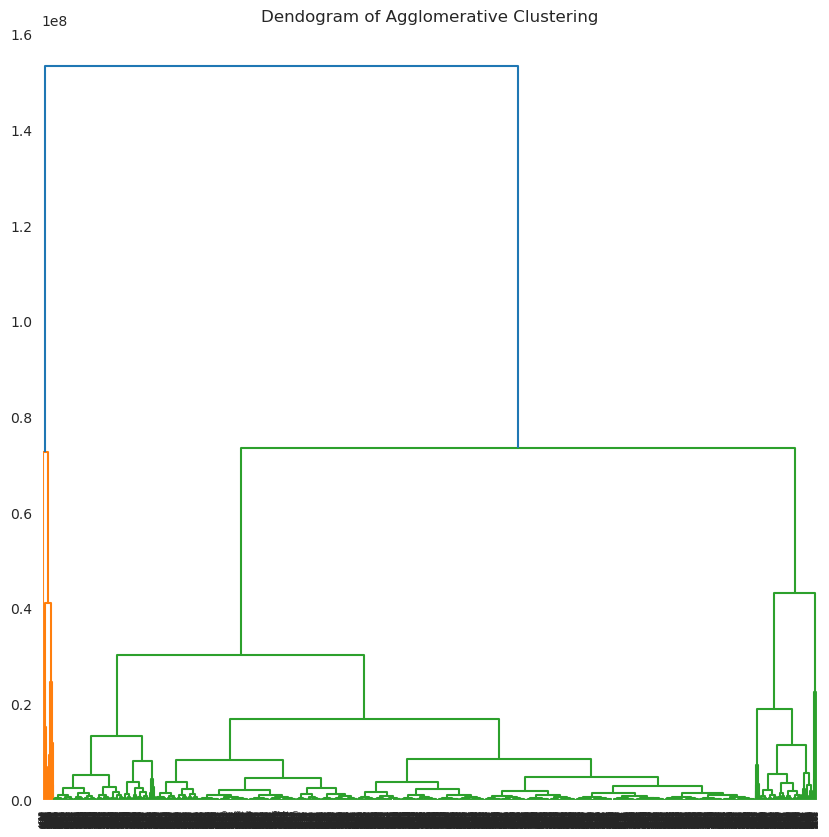

In [19]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
fig = plt.figure(figsize=(10,10))
plt.title('Dendogram of Agglomerative Clustering')
plot_dendrogram(cluster)
plt.show()

In [20]:
era5.latcent.unique()

array([85.598, 86.313, 85.479, ..., 81.482, 82.678, 83.427])

In [ ]:
# preprocessing

In [ ]:
# clustering

In [ ]:
# visualisation